In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d
import itertools
import os
from scipy.signal import find_peaks
import cv2

/tmp/ipykernel_153547/2164428936.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#print(mpl.rcParams.keys())
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams["mathtext.default"] = 'bf'
mpl.rcParams['xtick.major.width'] = 15

In [9]:
def plots(names,colors,root):
    
    epochs = np.arange(1,600)

    ords = ["val_loss"]
    
    absc = ['epochs','times'] 
    
    font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20
        }
    
    #ords = ['train_itera_loss']
    
    #absc = ['train_itera_time','iteras']
    
    sigma = 1
    
    fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(5,10))
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    
    k=-1
    couples = list(itertools.product([0,1],[0,1]))
    
    for y,x in  itertools.product(ords,absc):
        
        k+=1
        
        #(i,j)=couples[k]
        
        i = k
        
        print(i)
        
        #print(i,j)
        
        print(x,y)
        
        #with plt.style.context('seaborn-white'):
            
        for name,color in zip(names,colors):

            folder = os.path.join(root,name)

            results = np.load(folder+'.npy',allow_pickle='TRUE').item()

            results.update({'epochs':epochs})

            X,Y = results[x],results[y]

            Y = torch.Tensor(Y).cpu()

            Y = np.array(Y,dtype=np.float64)

            Y = gaussian_filter1d(Y,sigma=sigma)

            label = name.upper()

            ax[i].plot(results[x][:len(Y)],Y,label=label,color=color,linewidth=2)

        if x=="times":

            ax[i].set_xlabel('Time (s)',fontdict=font)

        else:

            ax[i].set_xlabel("Epoch",fontdict=font)

        if y=="train_loss":

            ax[i].set_ylabel("Training loss",fontdict=font)

        elif y=="val_loss":

            ax[i].set_ylabel("Validation loss",fontdict=font)

        elif y=="train_acc":

            ax[i].set_ylabel('Train accuracy',fontdict=font)

        elif y=="val_acc":

            ax[i].set_ylabel("validation accuracy",fontdict=font)

        elif y=="val_top5":

            ax[i].set_ylabel("validation top5 accuracy",fontdict=font)

        elif y=="train_top5":

            ax[i].set_ylabel("Train top5 accuracy",fontdict=font)

        elif y=="lrs":

            ax[i].set_ylabel("Learning rate",fontdict=font)

        if y in ["train_loss","val_loss"]:

            ax[i].set_yscale('log')
    plt.show()
    #fig.savefig("CNN_autoencoder/Figures/AUTO_SVHN_2048.jpg", format='JPEG',dpi=800,transparent = True, bbox_inches = 'tight')
            
    

0
epochs val_loss
1
times val_loss


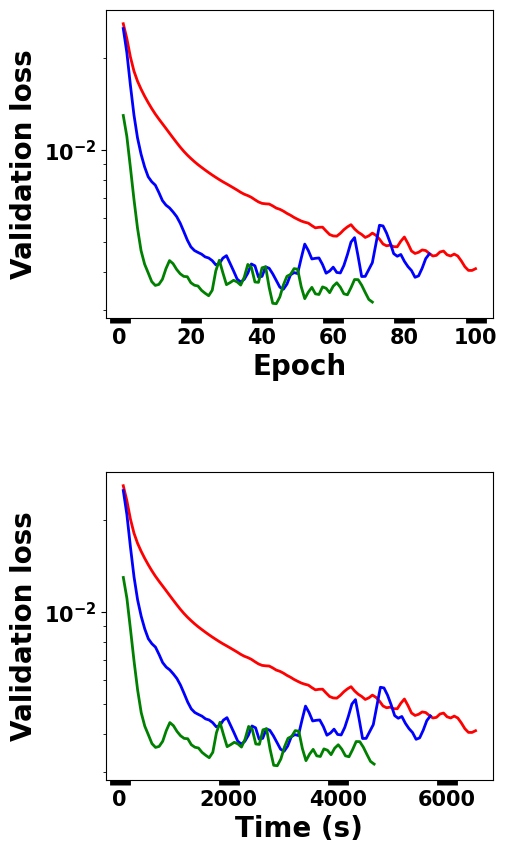

In [10]:
root = "./results_ref/CIFAR10/outputs_256"
names = ["sgd","adam","kfac"]
colors = ["red","blue","green",'black',"cyan"]
plots(names,colors,folder_dir)

In [11]:
folder = "./results_ref/MNIST/outputs_256/kfac_params.npy"
results = np.load(folder,allow_pickle=True).item()
print(results)

{'lr': 0.01, 'damping': 0.0001, 'kl': 1.0, 'weigt_decay': 0.001, 'momentum': 0.9}
